## Carregando os dados 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from seaborn import load_dataset

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [18]:
df = pd.read_csv('previsao_de_renda.csv')
df = df.drop(columns=['Unnamed: 0'])

## Ajustando os dados

Teste de variaveis explicativas, P-Value menor que 0.05 é bom. 

In [26]:
for col in ['tempo_emprego', 'posse_de_imovel', 'estado_civil', 'educacao']:  
    model = smf.ols(f'renda ~ {col}', data=df).fit()
    print(f"Variable: {col}, P-value: {model.pvalues[1]:.4f}")

Variable: tempo_emprego, P-value: 0.0000
Variable: posse_de_imovel, P-value: 0.6347
Variable: estado_civil, P-value: 0.0142
Variable: educacao, P-value: 0.6984


C:\Users\djang\AppData\Local\Temp\ipykernel_15208\1025208439.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Variable: {col}, P-value: {model.pvalues[1]:.4f}")
C:\Users\djang\AppData\Local\Temp\ipykernel_15208\1025208439.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Variable: {col}, P-value: {model.pvalues[1]:.4f}")
C:\Users\djang\AppData\Local\Temp\ipykernel_15208\1025208439.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, u

In [30]:
df['tempo_emprego'] = df['tempo_emprego'].round(2)

df = pd.get_dummies(df, columns=['posse_de_imovel'])
df = pd.get_dummies(df, columns=['estado_civil'])
df.head(5)

,data_ref,id_cliente,sexo,posse_de_veiculo,qtd_filhos,tipo_renda,educacao,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,posse_de_imovel_False,posse_de_imovel_True,estado_civil_Casado,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo
0,2015-01-01,15056,F,False,0,Empresário,Secundário,Casa,26,6.60,1.0,8060.34,False,True,False,False,True,False,False
1,2015-01-01,9968,M,True,0,Assalariado,Superior completo,Casa,28,7.18,2.0,1852.15,False,True,True,False,False,False,False
2,2015-01-01,4312,F,True,0,Empresário,Superior completo,Casa,35,0.84,2.0,2253.89,False,True,True,False,False,False,False
3,2015-01-01,10639,F,False,1,Servidor público,Superior completo,Casa,30,4.85,3.0,6600.77,False,True,True,False,False,False,False
4,2015-01-01,7064,M,True,0,Assalariado,Secundário,Governamental,33,4.29,1.0,6475.97,True,False,False,False,True,False,False


In [32]:
model = smf.ols('renda ~ tempo_emprego + estado_civil_Casado + estado_civil_Separado + estado_civil_União + estado_civil_Viúvo', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     446.7
Date:                Sun, 12 Jan 2025   Prob (F-statistic):               0.00
Time:                        19:15:48   Log-Likelihood:            -1.2960e+05
No. Observations:               12427   AIC:                         2.592e+05
Df Residuals:                   12421   BIC:                         2.593e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      1480.8664    225.055      6.580      0.000    1039.723    1922.010
estado_civil_Casado[T.True]    1024.2371    225.753      4.537      0.000     581.726    1466.748
estado_civil_Separado[T.True]   -89.5300    366.291     -0.244      0.807    -807.517     628.457
estado_civil_União[T.True]     -211.9710    340.547     -0.622      0.534    -879.496     455.554
estado_civil_Viúvo[T.True]    -1223.9689    500.449     -2.446      0.014   -2204.926    -243.012
tempo_emprego                   512.1716     10.953     46.760      0.000     490.702     533.641
==============================================================================
Omnibus:                    17007.657   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7666265.683
Skew:                           7.698   Prob(JB):                         0.00
Kurtosis:                     123.701   Cond. No.                         79.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
r_squared = model.rsquared
r_squared

0.15242361318290976

<Axes: xlabel='tempo_emprego', ylabel='renda'>

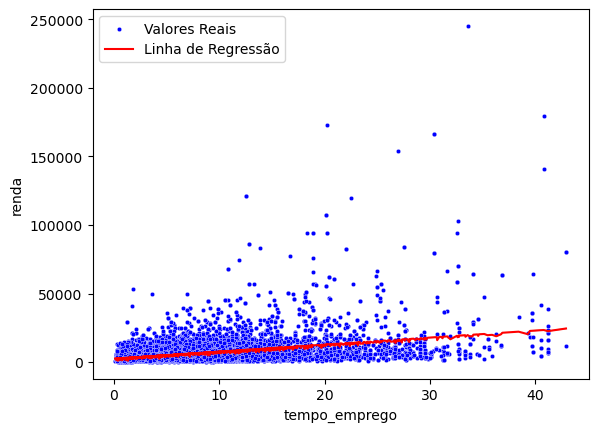

In [37]:
# Ajustar o modelo de regressão
model = smf.ols('renda ~ tempo_emprego + estado_civil_Casado + estado_civil_Separado + estado_civil_União + estado_civil_Viúvo', data=df).fit()

# Adicionar previsões ao DataFrame
df['predicted_renda'] = model.predict(df)

# Plotar os valores reais vs. previstos
sns.scatterplot(data=df, x='tempo_emprego', y='renda', color='blue', s=10, label='Valores Reais')
sns.lineplot(data=df, x='tempo_emprego', y='predicted_renda', color='red', label='Linha de Regressão')

## Ajustes nas variaveis explicativas

In [39]:
df['log_tempo_emprego'] = np.log(df['tempo_emprego'] + 1e-10)
df['log_estado_civil'] = np.log(
    df['estado_civil_Casado'] +
    df['estado_civil_Separado'] +
    df['estado_civil_União'] +
    df['estado_civil_Viúvo'] + 1e-9
)

model_log = smf.ols('renda ~ log_tempo_emprego + log_estado_civil', data = df).fit()

model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     627.7
Date:                Sun, 12 Jan 2025   Prob (F-statistic):          2.05e-260
Time:                        19:16:48   Log-Likelihood:            -1.3003e+05
No. Observations:               12427   AIC:                         2.601e+05
Df Residuals:                   12424   BIC:                         2.601e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1795.4165    149.192     12.034      0.000    1502.978    2087.856
log_tempo_emprego  2678.2839     75.918     35.279      0.000    2529.473    2827.095
log_estado_civil     24.4540     11.127      2.198      0.028       2.643      46.265
==============================================================================
Omnibus:                    17420.232   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8232487.558
Skew:                           8.064   Prob(JB):                         0.00
Kurtosis:                     128.057   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
r_squared_2 = model_log.rsquared
r_squared_2

0.09177022283088654

In [43]:
df['squared_tempo_empregado'] = df['tempo_emprego'] ** 2

model_poli = smf.ols('renda ~ squared_tempo_empregado', data = df).fit()

r_squared_3 = model_poli.rsquared
r_squared_3

0.14477200643812016